In [2]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import sys
sys.path.append('../')
from dataflow import Flow

In [5]:
data = Flow(None, None, None, '../neural_network/csv/preselected_pKmue_fullPlusFeatures_equalRatio_restrictedSideband.csv')
(X_train, y_train), (X_val, y_val), (X_test, y_test) = data.get_train_val_test_split()

In [23]:
neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_val)

In [24]:
b = preds == y_val

In [25]:
v = b.value_counts()
print(f"Binary Accuracy: {v[True]/(v[True] + v[False])}")

Binary Accuracy: 0.9030086550350322


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
allX, allY = pd.concat([X_train, X_val], sort=False, ignore_index=True), pd.concat([y_train, y_val], sort=False, ignore_index=True)

In [35]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0, validation_fraction=0.2).fit(allX, allY)
clf.score(X_test, y_test)

0.9093282044236846

In [45]:
probs = clf.predict_proba(X_test)
# Yields prob of class 1 and prob of class 0 etc in 2 x n array

In [46]:
probs.shape

(7279, 2)

In [48]:
import numpy as np
#probs = np.max(probs, axis=1)
probs.shape

(7279,)

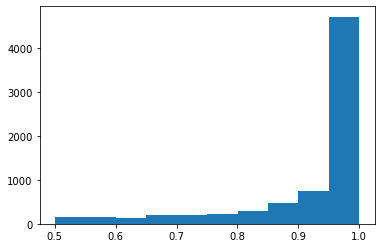

In [50]:
import matplotlib.pyplot as plt

plt.hist(probs, bins=10)
plt.show()